# IC Coding Etiquette and Excel Reporting Part 3

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Merging Orders_Products_All with Departments
## 04. Analyzing Departments
## 05. Customer Profile on Day of Week and Hour of Day
## 06. Customer Profile Aggregates of Usage Frequency and Expenditure
## 07. Customer Profile and Income
## 08. Customer Profile With Regions and Departments
## 09. Remaining Visuals
## 10. Export Charts and Data

## --

## 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Assigning path for import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A4_Python_Fundamentals_for_Data_Analysts\Instacart Basket Analysis_10_2023'

In [3]:
#Importing orders_products_all
ords_prods = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_profile.pkl'))

In [4]:
#Checking import with head()
ords_prods.head()

,user_id,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,order_day_of_week,...,loyalty_flag,average_price,spending_flag,average_days_since_prior_order,frequency_flag,region,exclusion_flag,age_group,income_group,customer_profile
0,26711,Missouri,48,1/1/2017,3,married,165665,2543867,5.0,1.0,...,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity,Age 33-48,High income,middle married dependants
1,26711,Missouri,48,1/1/2017,3,married,165665,1285508,7.0,5.0,...,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity,Age 33-48,High income,middle married dependants
2,26711,Missouri,48,1/1/2017,3,married,165665,2578584,8.0,1.0,...,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity,Age 33-48,High income,middle married dependants
3,26711,Missouri,48,1/1/2017,3,married,165665,423547,2.0,2.0,...,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity,Age 33-48,High income,middle married dependants
4,26711,Missouri,48,1/1/2017,3,married,165665,2524893,3.0,3.0,...,New Customer,12.6,High Spender,30.0,Non-frequent Customer,Midwest,Regular-activity,Age 33-48,High income,middle married dependants


In [5]:
#Checking import with shape
ords_prods.shape

(30993489, 34)

In [6]:
#Getting all column names from orders_products_all_profile
ords_prods.columns

Index(['user_id', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'order_id', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_label',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'average_days_since_prior_order',
       'frequency_flag', 'region', 'exclusion_flag', 'age_group',
       'income_group', 'customer_profile'],
      dtype='object')

In [7]:
#Checking dtype of department_id
ords_prods['department_id'].dtype

dtype('float64')

## 03. Merging Orders_Products_All with Departments

### Importing departments data.

In [8]:
#Importing departments_wrangled
deps = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'departments_wrangled.csv'), index_col = False)

In [9]:
#Checking import with head()
deps.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
#Checking import with shape
deps.shape

(21, 2)

### Preparing departments_wrangled for merge.

In [11]:
#Renaming Unnamed:0 in departments_wranged to department_id
deps.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace=True)

In [12]:
#Checking rename
deps.columns

Index(['department_id', 'department'], dtype='object')

In [13]:
#Changing dtype
deps['department_id'] = deps['department_id'].astype('float64')

In [14]:
#Checking output
deps['department_id'].dtype

dtype('float64')

### Executing merge.

In [15]:
#Merging
ords_prods_deps = ords_prods.merge(deps, on = 'department_id', how = 'outer', indicator = 'Tru')

In [16]:
#Checking merge
ords_prods_deps['Tru'].value_counts()

Tru
both          30964570
left_only        28919
right_only           0
Name: count, dtype: int64

## 04. Analyzing Departments

### Departments with most product orders.

In [17]:
#Frequency check on department
ords_prods_deps['department'].value_counts()

department
produce            9079276
dairy eggs         5177183
snacks             2766406
beverages          2571901
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [32]:
#Check of shape on department
ords_prods_deps['department'].shape

(30993489,)

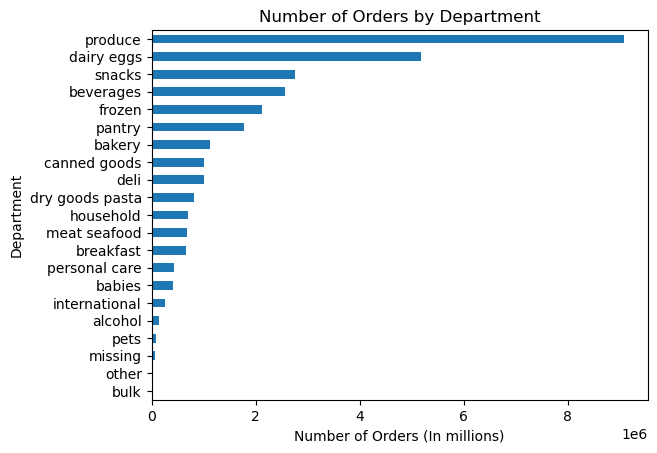

In [46]:
#Bar Graph of department frequency
department_bar = ords_prods_deps['department'].value_counts().plot.barh()
plt.title('Number of Orders by Department')
plt.ylabel('Department')
plt.xlabel('Number of Orders (In millions)')
plt.gca().invert_yaxis()

### Our top 5 departments are produce, dairy and eggs, snacks, beverages, and frozen.

## 05. Customer Profile on Day of Week and Hour of Day

### When customers under profile place an order during the week.

In [92]:
#Creating crosstab of customer profile and day of week
profile_day_cross = pd.crosstab(ords_prods_deps['order_day_of_week'], ords_prods_deps['customer_profile'], dropna = False)

In [93]:
profile_day_cross

customer_profile,middle married dependants,middle single no dependants,older married dependants,older single no dependants,younger married dependants,younger single dependants,younger single no dependants
order_day_of_week,,,,,,,
0.0,2203205,747376,1181320,386354,769902,281111,344720
1.0,2024958,683584,1070144,348701,698564,259748,331455
2.0,1512924,507204,803672,262477,515804,192581,233899
3.0,1374062,460684,735658,243537,470758,174613,213694
4.0,1361797,455310,721829,235174,465143,173406,215667
5.0,1502005,519663,803791,263267,520778,195649,232258
6.0,1615011,530809,862542,284450,549718,205613,246900


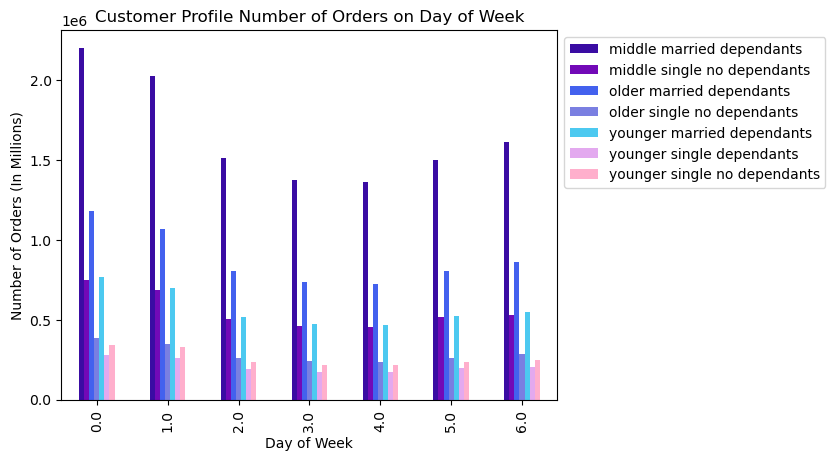

In [98]:
#Graph of crosstab
profile_day_bar = profile_day_cross.plot.bar(color=['#3a0ca3', '#7209b7', '#4361ee', '#7a7fe1', '#4cc9f0', '#e3a9ef', '#ffafcc'])
plt.title('Customer Profile Number of Orders on Day of Week')
plt.ylabel('Number of Orders (In Millions)')
plt.xlabel('Day of Week')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### When customers under profile place an order during the day.

In [100]:
#Creating crosstab of customer profile and hour of day
profile_hour_cross = pd.crosstab(ords_prods_deps['order_hour_of_day'], ords_prods_deps['customer_profile'], dropna = False)

In [101]:
profile_hour_cross

customer_profile,middle married dependants,middle single no dependants,older married dependants,older single no dependants,younger married dependants,younger single dependants,younger single no dependants
order_hour_of_day,,,,,,,
0.0,77545,26962,41047,12388,27479,10668,12128
1.0,40686,14024,22199,6506,14510,5561,6220
2.0,23765,8163,12629,4840,9113,3491,3743
3.0,17575,6017,9788,3616,6549,2538,2752
4.0,18640,6329,10667,3020,6487,2798,2862
5.0,30856,10369,17298,6005,10704,4345,4938
6.0,102989,34567,56620,18679,35867,14883,17703
7.0,318311,110177,174160,59138,109004,42282,51011
8.0,618336,213140,333908,108026,216350,75915,95234


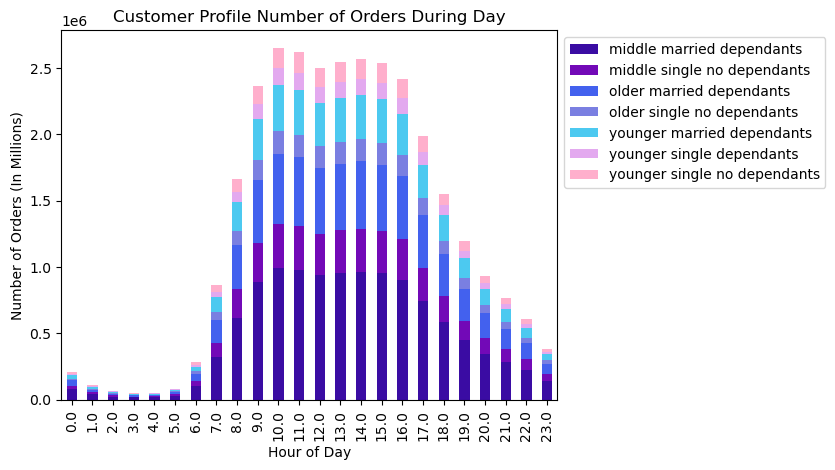

In [104]:
#Graph of crosstab
profile_hour_bar = profile_hour_cross.plot.bar(color=['#3a0ca3', '#7209b7', '#4361ee', '#7a7fe1', '#4cc9f0', '#e3a9ef', '#ffafcc'], stacked = True)
plt.title('Customer Profile Number of Orders During Day')
plt.ylabel('Number of Orders (In Millions)')
plt.xlabel('Hour of Day')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## 06. Customer Profile Aggregates of Usage Frequency and Expenditure

In [110]:
#Average, Min, and Max number of orders by customer_profile
ords_prods_deps.groupby('customer_profile').agg({'order_number' : ['mean', 'min', 'max']})

order_number           
                                     mean  min   max
customer_profile                                    
middle married dependants       17.822905  1.0  99.0
middle single no dependants     18.152495  1.0  99.0
older married dependants        17.767168  1.0  99.0
older single no dependants      17.835287  1.0  99.0
younger married dependants      17.665013  1.0  99.0
younger single dependants       18.000231  1.0  99.0
younger single no dependants    17.677283  1.0  99.0

In [111]:
#Average, Min, and Max revenue by customer_profile
ords_prods_deps.groupby('customer_profile').agg({'prices' : ['mean', 'min', 'max']})

prices           
                                  mean  min   max
customer_profile                                 
middle married dependants     7.790622  1.0  25.0
middle single no dependants   7.790212  1.0  25.0
older married dependants      7.794990  1.0  25.0
older single no dependants    7.801982  1.0  25.0
younger married dependants    7.781983  1.0  25.0
younger single dependants     7.800604  1.0  25.0
younger single no dependants  7.774294  1.0  25.0

## 07. Customer Profile and Income

In [117]:
#Creating crosstab of customer profile and income
profile_income_cross = pd.crosstab(ords_prods_deps['customer_profile'], ords_prods_deps['income_group'], dropna = False)

In [118]:
profile_income_cross

income_group,High income,Low income,Medium-high income,Medium-low income
customer_profile,,,,
middle married dependants,3369925,2480879,3277105,2466053
middle single no dependants,1155831,831279,1098473,819047
older married dependants,2369027,804050,2169663,836216
older single no dependants,771359,251136,726954,274511
younger married dependants,45230,1866972,257884,1820581
younger single dependants,17785,664686,94661,705589
younger single no dependants,19085,849454,122601,827453


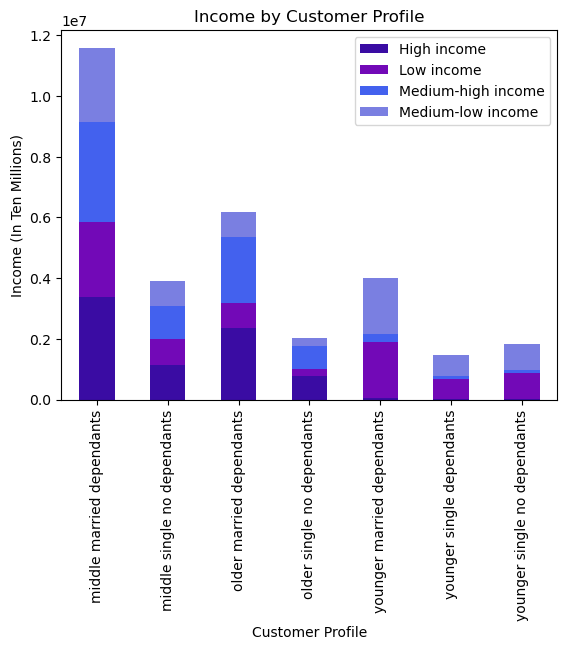

In [123]:
#Creating graph of crosstab
profile_income_bar = profile_income_cross.plot.bar(color=['#3a0ca3', '#7209b7', '#4361ee', '#7a7fe1', '#4cc9f0', '#e3a9ef', '#ffafcc'], stacked = True)
plt.title('Income by Customer Profile')
plt.ylabel('Income (In Ten Millions)')
plt.xlabel('Customer Profile')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## 08. Customer Profile With Regions and Departments

In [129]:
#Creating crosstab of customer profile and regions
profile_region_cross = pd.crosstab(ords_prods_deps['region'], ords_prods_deps['customer_profile'], dropna = False)

In [130]:
profile_region_cross

customer_profile,middle married dependants,middle single no dependants,older married dependants,older single no dependants,younger married dependants,younger single dependants,younger single no dependants
region,,,,,,,
Midwest,2729531,945440,1435015,470487,927126,351719,408584
Northeast,2051117,641233,1107039,379235,699375,256791,335374
South,3854528,1303718,2052581,658321,1323290,505953,622440
West,2958786,1014239,1584321,515917,1040876,368258,452195


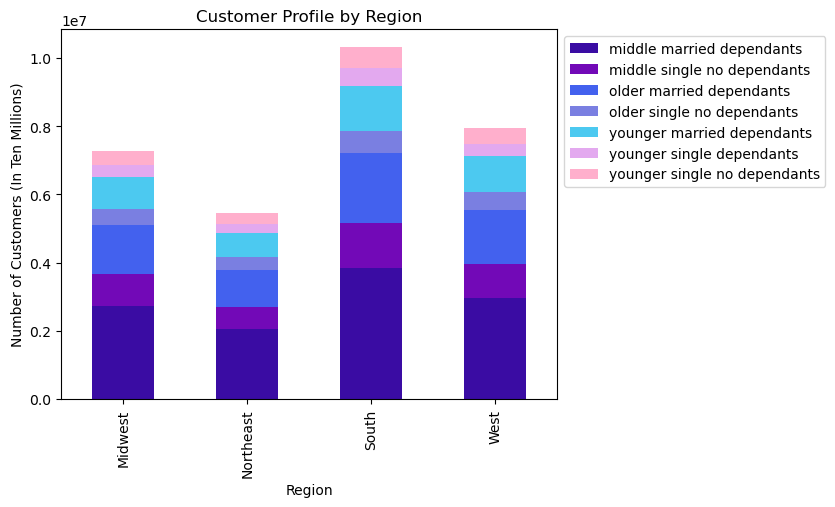

In [132]:
#Creating graph of crosstab
profile_region_bar = profile_region_cross.plot.bar(color=['#3a0ca3', '#7209b7', '#4361ee', '#7a7fe1', '#4cc9f0', '#e3a9ef', '#ffafcc'], stacked = True)
plt.title('Customer Profile by Region')
plt.ylabel('Number of Customers (In Ten Millions)')
plt.xlabel('Region')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [143]:
#Creating crosstab of customer profile and departments
profile_dep_cross = pd.crosstab(ords_prods_deps['department'], ords_prods_deps['customer_profile'], dropna = False)

In [144]:
profile_dep_cross

customer_profile,middle married dependants,middle single no dependants,older married dependants,older single no dependants,younger married dependants,younger single dependants,younger single no dependants
department,,,,,,,
alcohol,52934,19606,27554,9139,18933,8379,8082
babies,157210,51893,80312,25892,50161,19381,25543
bakery,418787,142672,223579,72418,143383,53684,66305
beverages,961795,326477,515378,168642,330280,119107,150222
breakfast,251522,84613,132810,42486,86888,33198,39333
bulk,12598,3937,6851,2094,4369,1633,1969
canned goods,377645,126858,202766,64743,132166,48477,59419
dairy eggs,1932019,651753,1029272,338800,671309,250207,303823
deli,374168,129526,199831,65368,128334,48119,58488


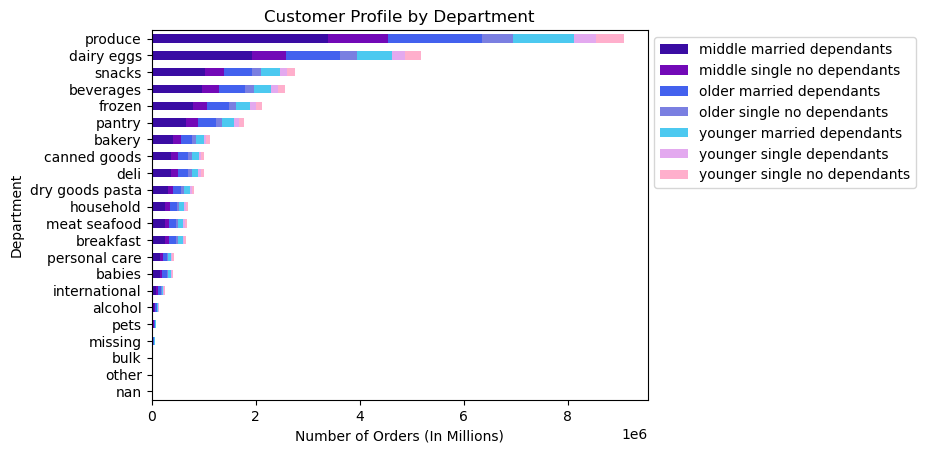

In [155]:
#Creating graph of crosstab
profile_dep_bar = profile_dep_cross.sort_values(by='middle married dependants', ascending=True).plot.barh(color=['#3a0ca3', '#7209b7', '#4361ee', '#7a7fe1', '#4cc9f0', '#e3a9ef', '#ffafcc'], stacked = True)
plt.title('Customer Profile by Department')
plt.ylabel('Department')
plt.xlabel('Number of Orders (In Millions)')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## 09. Remaining Visuals

### Frequency count of customer profile.

Text(0.5, 0, 'Customer Profile')

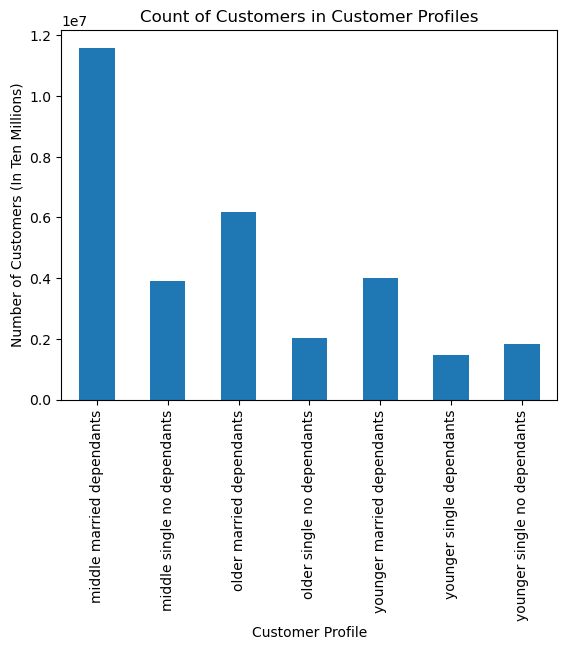

In [107]:
profile_bar = ords_prods_deps['customer_profile'].value_counts().sort_index().plot.bar()
plt.title('Count of Customers in Customer Profiles')
plt.ylabel('Number of Customers (In Ten Millions)')
plt.xlabel('Customer Profile')

### Loyalty customers order habbits.

In [60]:
#Creating crosstab of loyalty and frequency
loyalty_freq_cross = pd.crosstab(ords_prods_deps['loyalty_flag'], ords_prods_deps['frequency_flag'], dropna = False)

In [61]:
loyalty_freq_cross

frequency_flag,Frequent Customer,Non-frequent Customer,Regular Customer
loyalty_flag,,,
Loyal Customer,699445,5336152,4258430
New Customer,205506,4038836,563613
Regular Customer,334246,14073920,1483341


In [62]:
#Copying crosstab to clipboard
loyalty_freq_cross.to_clipboard()

### Relationship between age, family status, and ordering habits.

In [63]:
#Creating crosstab of age and frequency
age_freq_cross = pd.crosstab(ords_prods_deps['age_group'], ords_prods_deps['frequency_flag'], dropna = False)

In [64]:
age_freq_cross

frequency_flag,Frequent Customer,Non-frequent Customer,Regular Customer
age_group,,,
Age 18-32,274153,5560179,1457649
Age 33-48,314568,5854514,1593442
Age 49-64,327508,5835685,1572875
Age 65-81,322968,6198530,1681418


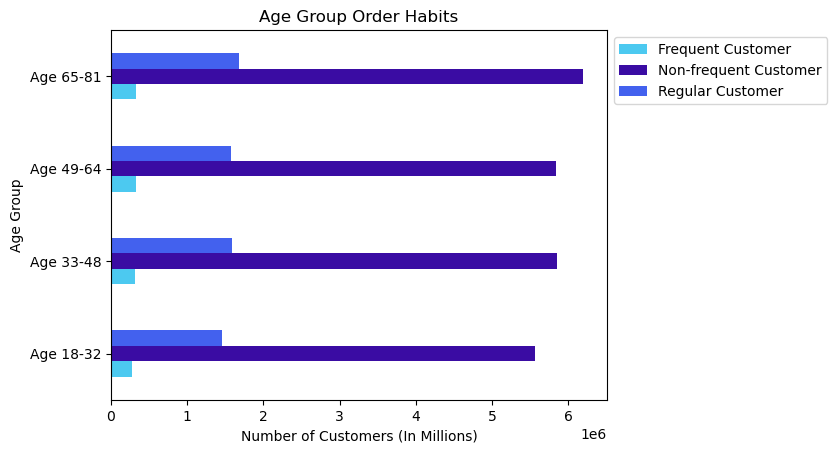

In [138]:
#Graph of crosstab
age_freq_bar = age_freq_cross.plot.barh(color=['#4cc9f0', '#3a0ca3', '#4361ee'])
plt.title('Age Group Order Habits')
plt.ylabel('Age Group')
plt.xlabel('Number of Customers (In Millions)')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [65]:
#Creating crosstab of family status and frequency
family_freq_cross = pd.crosstab(ords_prods_deps['family_status'], ords_prods_deps['frequency_flag'], dropna = False)

In [66]:
family_freq_cross

frequency_flag,Frequent Customer,Non-frequent Customer,Regular Customer
family_status,,,
divorced/widowed,106263,2005321,536215
living with parents and siblings,60814,1133889,288018
married,849712,16465110,4448763
single,222408,3844588,1032388


In [68]:
#Copying crosstab to clipboard
family_freq_cross.to_clipboard()

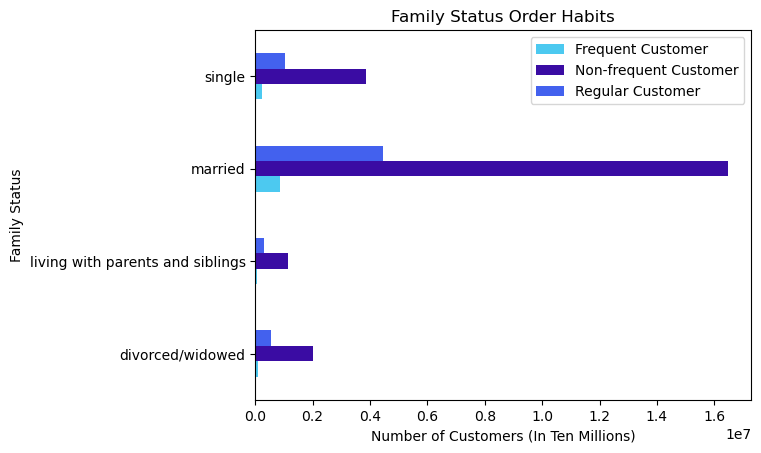

In [139]:
#Graph of crosstab
family_freq_bar = family_freq_cross.plot.barh(color=['#4cc9f0', '#3a0ca3', '#4361ee'])
plt.title('Family Status Order Habits')
plt.ylabel('Family Status')
plt.xlabel('Number of Customers (In Ten Millions)')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## 10. Export Charts and Data

In [140]:
#Exporting department frequency chart
department_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'department_bar.png'))

In [141]:
#Exporting age by frequency chart
age_freq_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'age_freq_bar.png'))

In [142]:
#Exporting family status by frequency chart
family_freq_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'family_freq_bar.png'))

In [99]:
#Exporting customer profile order by day bar
profile_day_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_day_bar.png'))

In [105]:
#Exporting customer profile order by hour of day
profile_hour_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_hour_bar.png'))

In [108]:
#Exporting customer profile frequency
profile_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_bar.png'))

In [125]:
#Exporting customer profile by income
profile_income_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_income_bar.png'))

In [133]:
#Exporting customer profile by region
profile_region_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_region_bar.png'))

In [156]:
#Exporting customer profile by department
profile_dep_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'profile_dep_bar.png'))

In [157]:
#Exporting orders_products_all after department merge
ords_prods_deps.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_departments_regular.pkl'))